In [3]:
import re
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
df=pd.read_csv(r'C:\Users\91867\Desktop\twitter_new.csv',encoding='latin-1',names = ['target','ids','date','flag','user','text'], delimiter=",")
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [49]:
df.shape

(1600000, 6)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [51]:
df.value_counts('target')

target
0    800000
4    800000
dtype: int64

<Axes: xlabel='target', ylabel='count'>

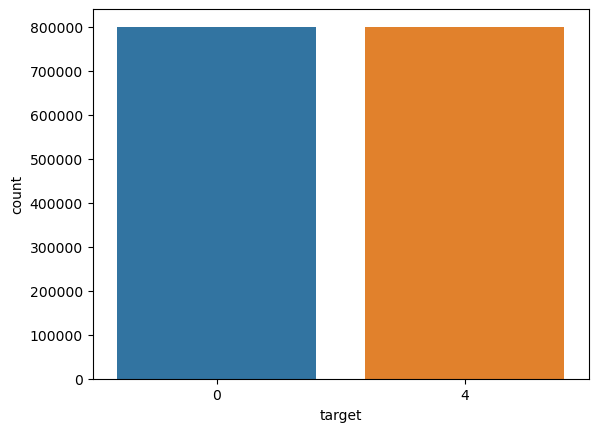

In [52]:
sns.countplot(x='target', data=df)

In [53]:
df.drop(["ids","date","flag","user"],axis=1,inplace=True)

In [54]:
df

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [55]:
df['text']

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: object

In [56]:
df['text'] = df['text'].str.replace("[^a-zA-Z0-9]", " ")

C:\Users\91867\AppData\Local\Temp\ipykernel_20872\4125222639.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace("[^a-zA-Z0-9]", " ")


In [57]:
df

,target,text
0,0,switchfoot http twitpic com 2y1zl Awww t...
1,0,is upset that he can t update his Facebook by ...
2,0,Kenichan I dived many times for the ball Man...
3,0,my whole body feels itchy and like its on fire
4,0,nationwideclass no it s not behaving at all ...
...,...,...
1599995,4,Just woke up Having no school is the best fee...
1599996,4,TheWDB com Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time ...


In [58]:
stopwords = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'you\'re', 
    'you\'ve', 'you\'ll', 'you\'d', 'your', 'yours', 'yourself', 'yourselves', 'he', 
    'him', 'his', 'himself', 'she', 'she\'s', 'her', 'hers', 'herself', 'it', 'it\'s', 
    'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 
    'who', 'whom', 'this', 'that', 'that\'ll', 'these', 'those', 'am', 'is', 'are', 
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 
    'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 
    'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 
    'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 
    'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 
    'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 
    'will', 'just', 'don', 'don\'t', 'should', 'should\'ve', 'now', 'd', 'll', 
    'm', 'o', 're', 've', 'y', 'ain', 'aren', 'aren\'t', 'couldn', 'couldn\'t', 
    'didn', 'didn\'t', 'doesn', 'doesn\'t', 'hadn', 'hadn\'t', 'hasn', 'hasn\'t', 
    'haven', 'haven\'t', 'isn', 'isn\'t', 'ma', 'mightn', 'mightn\'t', 'mustn', 
    'mustn\'t', 'needn', 'needn\'t', 'shan', 'shan\'t', 'shouldn', 'shouldn\'t', 
    'wasn', 'wasn\'t', 'weren', 'weren\'t', 'won', 'won\'t', 'wouldn', 'wouldn\'t']

In [59]:
import nltk
# Define a function to clean and preprocess the text data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    # Remove stop words
    words = [word for word in words if not word in stopwords]
    # Join the remaining words back into a single string
    cleaned_text = ' '.join(words)
    return cleaned_text

# Apply the preprocess_text function to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

# Print the first few rows of the cleaned dataframe
print(df.head())

   target                                               text
0       0  switchfoot http twitpic com 2y1zl awww bummer ...
1       0  upset update facebook texting might cry result...
2       0  kenichan dived many times ball managed save 50...
3       0                   whole body feels itchy like fire
4       0                   nationwideclass behaving mad see


Positive 

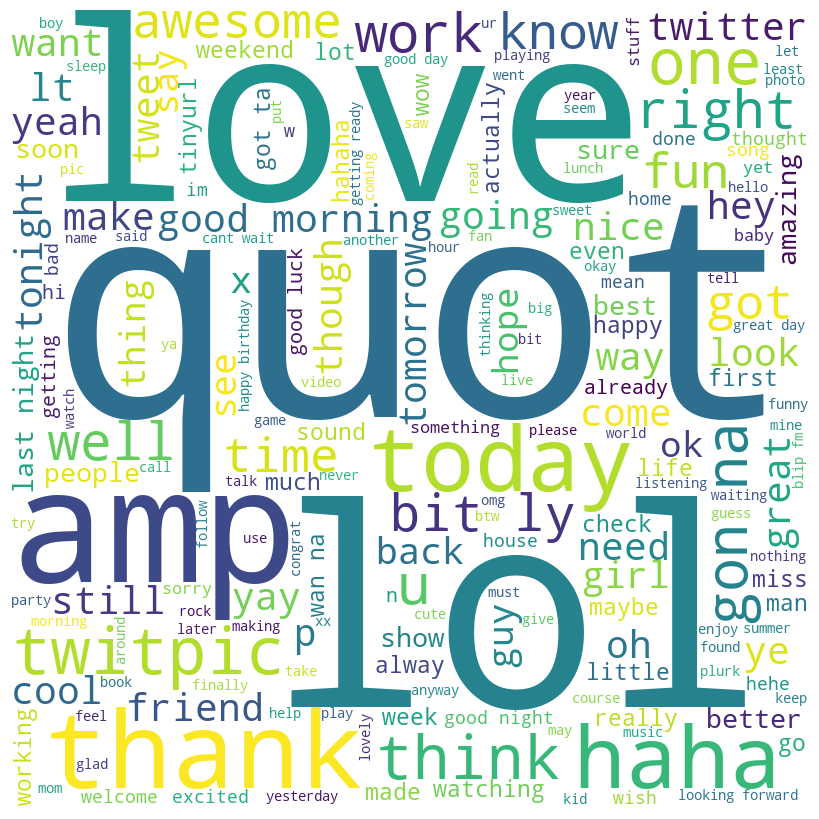

In [67]:
from wordcloud import WordCloud
word_cloud_df = df.loc[df['target'] == 4 ,:]
all_words = ' '.join([text for text in word_cloud_df['text']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

Negative

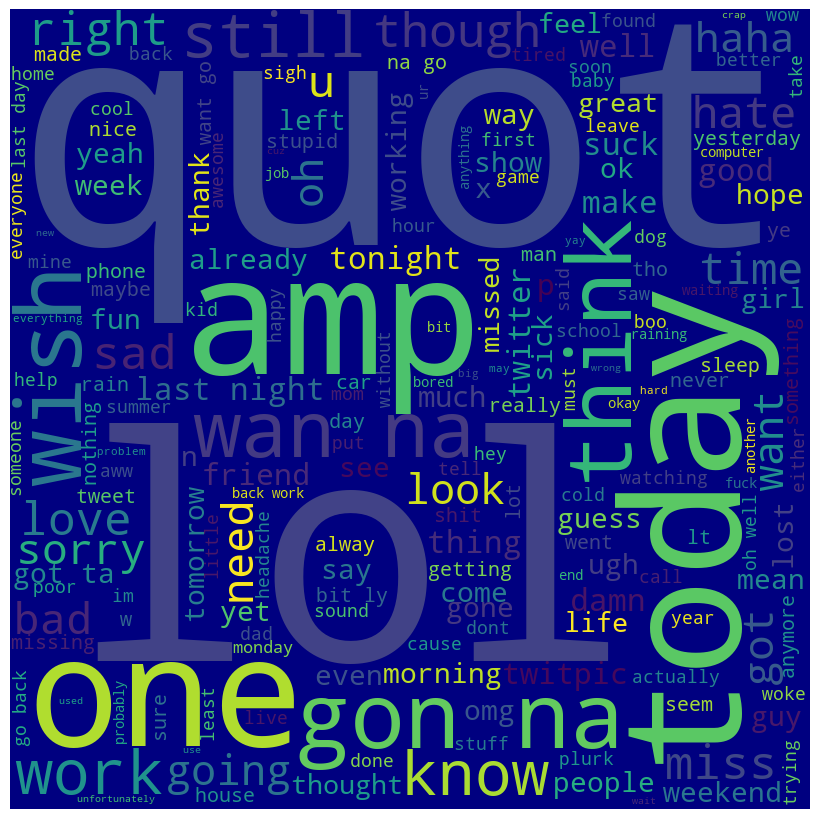

In [78]:
from wordcloud import WordCloud
word_cloud_df = df.loc[df['target'] == 0 ,:]
all_words = ' '.join([text for text in word_cloud_df['text']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='navy', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [79]:
x=df['text']
y=df['target']

In [80]:
tf=TfidfVectorizer()
x=tf.fit_transform(x)

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3) 

In [82]:
model=LogisticRegression()
model.fit(x_train,y_train)
#score of the model
model.score(x_test,y_test)

C:\Users\91867\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7804979166666667

In [83]:
# Cross Validation
from sklearn.model_selection import cross_val_score
cross_val_score(model,x,y,cv=5).mean()

C:\Users\91867\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91867\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.77434125

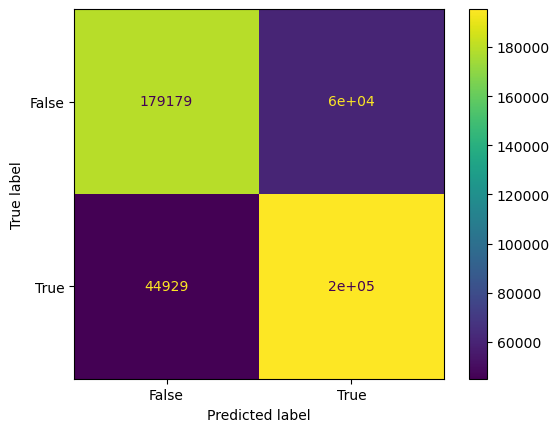

In [84]:
# Confusion Matrix
from sklearn import metrics
con=metrics.confusion_matrix(y_test,model.predict(x_test))
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=con,display_labels=[False,True])
cm_display.plot()